# Overview

In this project, I am a Data Scientist contractor working with different Women's Fashion Brands, such as Zara and H&M, to classify comments as negative or positive. This project aims to create a generalizable classification model that can be fed comments from any platform, such as Twitter, Instagram, or blogs. For demonstration purposes, I will utilize my model to classify tweets as positive or negative so the customer service teams can respond appropriately, such as responding to customer concerns in negative tweets and retweeting positive tweets.


# Business Understanding

Natural language processing (NLP) has proved to be a highly effective technology for companies to save time and money while optimizing business processes. One of the major benefits of natural language processing for businesses is the ability to process massive volumes of text across various outlets, such as social media platforms, blogs, comments, and so on. By utilizing a machine learning model to classify text as positive or negative, businesses can send the comments to the appropriate teams, such as Quality Assurance for negative comments or Marketing for positive comments. Social media is the second most preferred channel (after an in-person interaction) for customers to initiate communication; for millennials, social media is the most preferred channel. It is important for businesses to respond to these comments in order to protect the brand's reputation, show customers your care, reduce churn, and improve visibility to potential new customer bases and improve customer loyalty for current customers. Generalizability is important with the constant evolution of technology, social media, and how users choose to interact with products and brands. While one brand may receive lots of tweets, another brand may be discussed more in the comments of their Instagram posts.

## Use Cases

Positive Comments
- Retweet or repost from the Brand account
- Respond to boost that comment and reach more viewers
- Identify positive trends, such as colors or fit types, that multiple users are responding to
- Improve brand loyalty

Negative Comments
- Respond to help customers feel heard and solve any fixable issues
- Identify issues with items before next drops, such as colors not photographing accurately on website or quality issues with fabric
- Improve brand loyalty 


## Why utilize data from reviews?

Reviews left by customers contain both text reviews (the meat of the review) in conjunction with a rating. By utilizing reviews as my source, I am able to easily assign a label of Positive_Rating (0 being false, 1 being true) to the review text based on the rating. This helps my model learn what words are associated with a positive sentiment and what words may be more associated with a negative sentiment. I can then apply this model to texts that are not accompanied by a number rating, such as tweets, Instagram captions, blog posts, and more.

# Data Cleaning and Understanding

Data for this project was pulled from a compiled dataset of Women's E-Commerce Clothing Reviews compiled in one CSV file. The dataset can be found [here](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews). 


The review data contained 23,486 reviews. Additional variables included Clothing ID, Age, Title (of the review if there was one), Review Text, Rating, Recommended IND (whether or not the customer recommends a product), Positive Feedback Count (number of other customers who found the review positive), Division Name (categorical name of product high-level division), Department Name, and Class Name. Reviews ranged on a scale of 1-5. A majority of reviews received an overall rating of 5, which could be a limitation to the model.

### Loading Necessary Imports

In [1]:
#Basic imports
import pandas as pd
import numpy as np

#Required data visualisation libraries are imported
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.io import to_image
import plotly.express as px

#WordCloud
from wordcloud import WordCloud
from os import path
from PIL import Image
import os

#Required text pre-processing libraries are imported
import string
import nltk
import re

# download the stopwords and wordnet corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
# import tokenize from nltk library
from nltk import tokenize
# import WordNetLemmatizer from nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jillian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading in Dataset

In [2]:
df = pd.read_csv('./data/Womens Clothing E-Commerce Reviews 2.csv')

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


### Initial Data Cleaning

In [5]:
#checking my initial data types and null counts

In [6]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
#droping rows that do not contain review text; only about 3.6% of data

In [8]:
df = df[df['Review Text'].isna()==False]

In [9]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [10]:
#currently at 22,641 columns

In [11]:
#dropping addditional index column

In [12]:
df.drop(columns='Unnamed: 0', inplace=True)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
#Checking for any duplicated reviews

In [14]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [15]:
df[df.Title.isna()==True]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
11,1095,39,NaN,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses
30,1060,33,NaN,Beautifully made pants and on trend with the f...,5,1,0,General Petite,Bottoms,Pants
36,1002,29,NaN,This is a comfortable skirt that can span seas...,4,1,5,General,Bottoms,Skirts
...,...,...,...,...,...,...,...,...,...,...
23425,430,23,NaN,A great long line bra! beautiful and well made...,4,1,1,Initmates,Intimate,Intimates
23435,262,26,NaN,Love the pattern. the pants are really cute! p...,4,1,0,General Petite,Intimate,Lounge
23450,964,40,NaN,I wanted to love this jacket. so soft and grea...,3,0,4,General,Jackets,Jackets
23453,1104,39,NaN,"I am 5' 2"" about 118 lbs. thought this fit rea...",4,1,0,General Petite,Dresses,Dresses


In [16]:
#although there are many NaNs in the "Title" column, we will not be utilizng this column for classification; will keep
#these rows since they contain "Review Text" content

In [17]:
df[df['Division Name'].isna()==True]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN
21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,1,0,NaN,NaN,NaN


In [18]:
#although these rows are all missing Division Name, Department Name, and Class Name, they contain
#Review Text so I will keep these rows

In [19]:
#checking for any duplicated reviews

In [20]:
df.duplicated().value_counts()

False    22640
True         1
dtype: int64

In [21]:
#it looks like there is one duplicate entry; locating that entry

In [22]:
df[df.duplicated() == True]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
21888,1022,37,NaN,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans


In [23]:
#dropping the duplicated review

In [24]:
df.drop(21888, inplace=True)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [26]:
#confirming df has one less row, drop was successful

### Initial Data Exploration

In [27]:
#quick plots of each column

In [28]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

<ipython-input-28-c4d51ae7f98d>:9: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

<ipython-input-28-c4d51ae7f98d>:9: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

<ipython-input-28-c4d51ae7f98d>:9: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



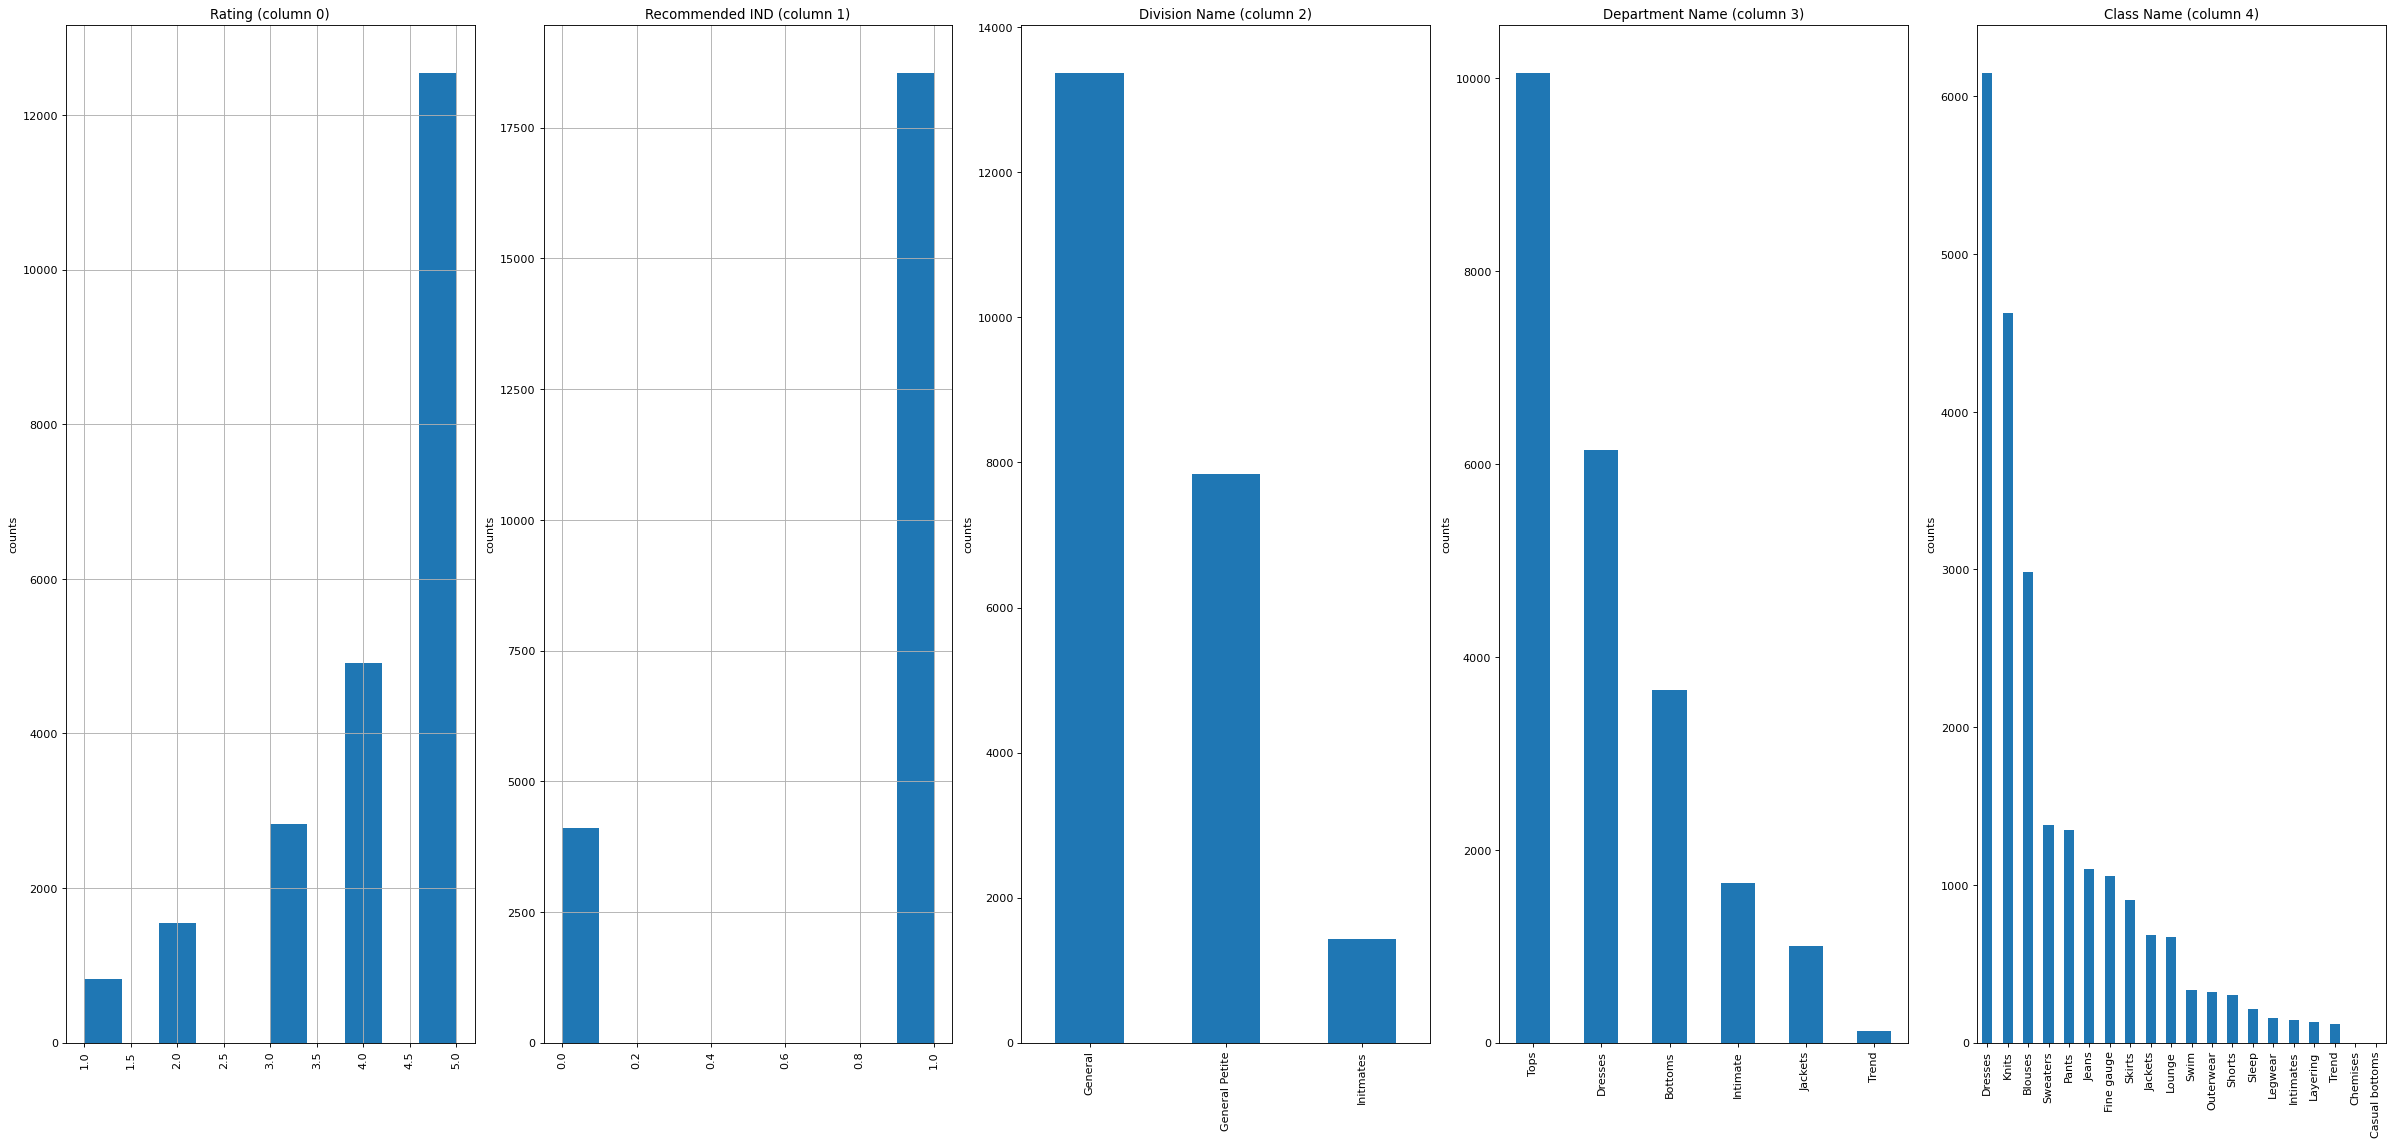

In [29]:
plotPerColumnDistribution(df, 10, 5)

In [30]:
#looking at distribution of age for background knowledge

In [31]:
df.Age.describe()

count    22640.000000
mean        43.280654
std         12.327181
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

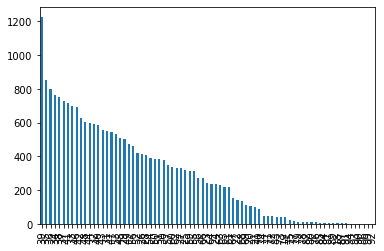

In [32]:
df.Age.value_counts().plot(kind='bar');

In [33]:
#looking at distribution of rating for background knowledge

In [34]:
df.Rating.describe()

count    22640.000000
mean         4.183525
std          1.115774
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [35]:
df.Rating.value_counts()

5    12539
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

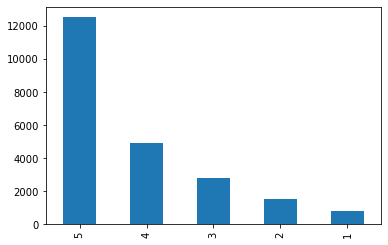

In [36]:
df.Rating.value_counts().plot(kind = 'bar');

In [37]:
#created better visualiztion for presentation purposes

In [38]:
init_notebook_mode(connected=True)

data = df['Rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} Reviews'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

 # Do this first so we don't create a file if image conversion fails
img_data = to_image(fig,
        format='png',
        width=800,
        height=500,
        scale=5)

fig.write_image("./images/reviews_distribution.png", scale=5)

In [39]:
#looking at distribution of Recommend Ind

In [40]:
df['Recommended IND'].value_counts()

1    18539
0     4101
Name: Recommended IND, dtype: int64

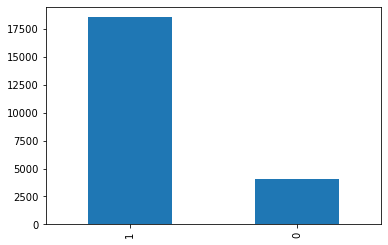

In [41]:
df['Recommended IND'].value_counts().plot(kind = 'bar');

In [42]:
#created better visualiztion for presentation purposes

In [43]:
data = df['Recommended IND'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} Reviews for Recommended or Not'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

 # Do this first so we don't create a file if image conversion fails
img_data = to_image(fig,
        format='png',
        width=800,
        height=500,
        scale=5)

fig.write_image("./images/recommendedIND_distribution.png", scale=5)

In [44]:
#large skew in our data; most of our data is recommended and a high % of our data received a rating of "5"

In [45]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

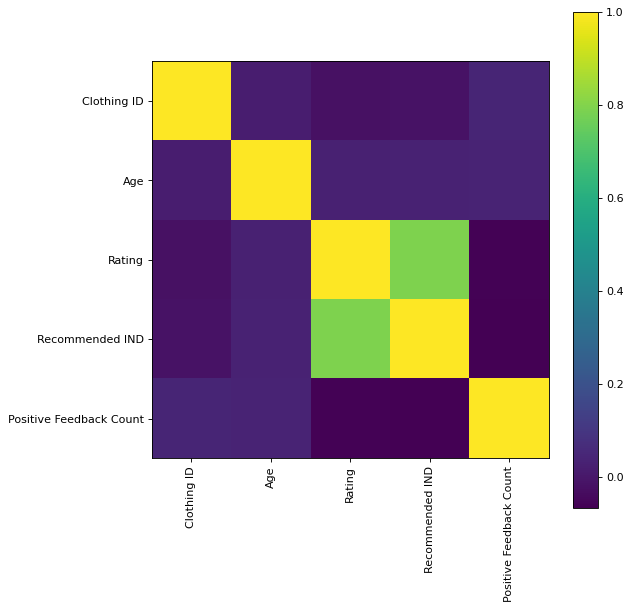

In [46]:
plotCorrelationMatrix(df, 8);

In [47]:
#would expect Recmomended IND and Rating to be positively correlated, which they are

In [48]:
#adding polarity and subjectivity column so I can visualize how these columns change after preprocessing

In [49]:
from textblob import TextBlob
df['Polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).polarity)
df['Subjective'] = df['Review Text'].apply(lambda x: TextBlob(x).subjectivity)

<ipython-input-49-237c8c806210>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-237c8c806210>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Subjective
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750


In [51]:
#Changing variables headers to remove spaces for modelling
df = df.rename(columns={'Clothing ID' : 'Clothing_ID', 'Review Text': 'Review_Text', 'Recommended IND': 'Recommended_IND', 'Positive Feedback Count':'Positive_Feedback_Count', 'Division Name': 'Division_Name', 'Class Name': 'Class_Name'})

In [52]:
#creating new Target class called "Positive_Rating"; this will break up reviews into positive
#or negative sentiment, based on their rating
#for the purposes of this, a rating of 4-5 will be positive (1) and a rating of 1-3 will be
#negative/neutral (2)

In [53]:
def target_label(row):
    if row['Rating'] == 4:
      return 1
    elif row['Rating'] == 5:
        return 1
    else:
        return 0

In [54]:
df['Positive_Rating'] = df.apply(lambda row: target_label(row), axis=1)

In [55]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Positive_Rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,1


In [56]:
#looking at the distrubiton of positive review vs not positive

In [57]:
data = df['Positive_Rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} Reviews for Positive or Not'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

 # Do this first so we don't create a file if image conversion fails
img_data = to_image(fig,
        format='png',
        width=800,
        height=500,
        scale=5)


fig.write_image("./images/target_distribution.png", scale=5)


<ipython-input-110-c667b3d454c0>:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



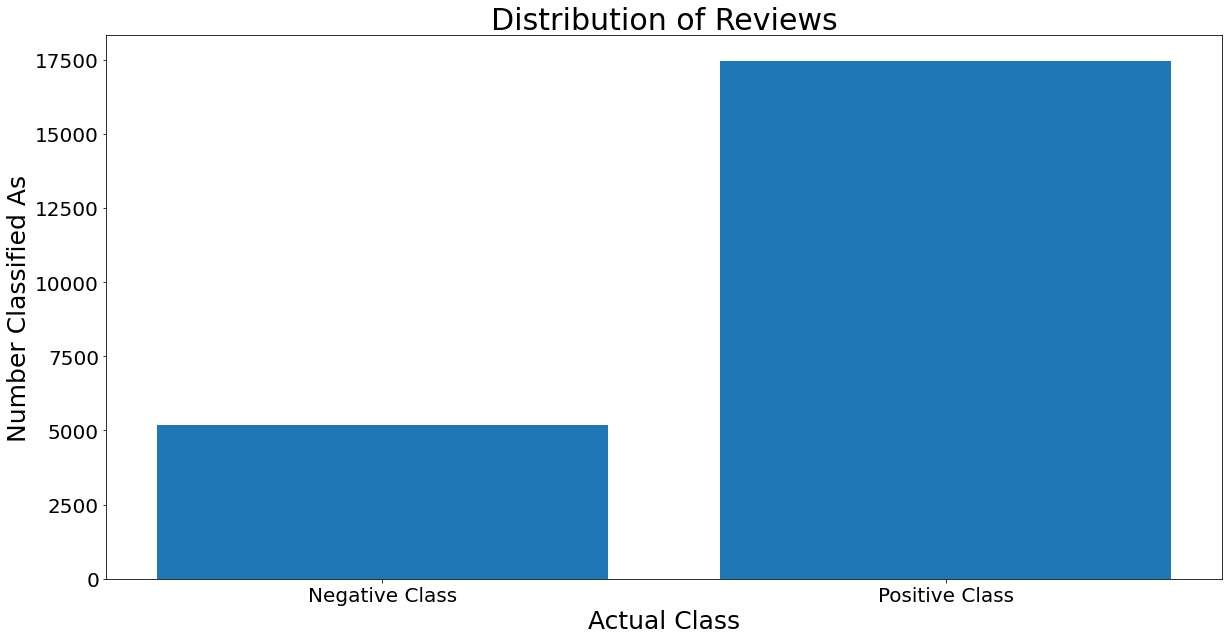

In [110]:
results_dict = {'Negative': df['Positive_Rating'].value_counts()[0], 
                'Positive': df['Positive_Rating'].value_counts()[1]} 

dict_keys = list(results_dict.keys())
dict_values = list(results_dict.values())

fig, ax = plt.subplots(figsize=(20, 10))
plt.rcParams.update({'font.size': 15})

ax.set_title('Distribution of Reviews', fontsize=30)
ax.set_ylabel('Number Classified As', fontsize=25)
ax.set_xticklabels( ('Negative Class', 'Positive Class'), fontsize=20 )
ax.set_xlabel('Actual Class', fontsize=25)

ax.bar(dict_keys, dict_values, align='center')
plt.savefig('./images/target_distribution_presentation.png', dpi=400)
plt.show();


In [59]:
#looking at the imbalance between sentiments and recommended based on rating

In [60]:
df[df["Positive_Rating"] != df["Recommended_IND"]]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Positive_Rating
14,1077,50,Pretty party dress with some issues,This is a nice choice for holiday gatherings. ...,3,1,1,General,Dresses,Dresses,-0.057143,0.517857,0
16,1065,34,"You need to be at least average height, or taller",Material and color is nice. the leg opening i...,3,1,2,General,Bottoms,Pants,0.134921,0.454762,0
23,1077,34,"Like it, but don't love it.",Cute little dress fits tts. it is a little hig...,3,1,0,General,Dresses,Dresses,0.269286,0.634286,0
52,1104,39,NaN,"Love the color and style, but material snags e...",3,1,3,General,Dresses,Dresses,0.466667,0.716667,0
84,861,37,Casual & unique tee,I received this shirt in my typical xs and it ...,3,1,0,General Petite,Tops,Knits,0.089583,0.695000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23452,999,38,Full skirt,I ordered this skirt hoping i could wear it to...,3,1,1,General,Bottoms,Skirts,0.137500,0.450000,0
23462,999,24,Its okay,The pattern of this skirt is adorable and look...,3,1,0,General,Bottoms,Skirts,0.500000,0.560000,0
23475,1104,41,Cute dress,Cute dress but not for me. the waist is too h...,3,1,0,General Petite,Dresses,Dresses,0.296286,0.685143,0
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,0.708333,0


In [61]:
df.Rating[df.Positive_Rating != df.Recommended_IND].value_counts()

3    1170
4     164
2      94
5      23
1      15
Name: Rating, dtype: int64

In [62]:
#we see there are 1,466 reviews where the person either recommended the product but did not rate it with a 4 or 5
#OR did NOT recommend the product, but rated it a 4 or 5

In [63]:
pd.set_option('display.max_colwidth', None)

In [64]:
df[df["Positive_Rating"] != df["Recommended_IND"]][df.Rating == 1]

<ipython-input-64-8749bb45e440>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Positive_Rating
2427,939,39,NaN,Beautiful jacket and i got lots of compliments. true to size. it's not thick but it's very warm.,1,1,0,General,Tops,Sweaters,0.532500,0.726250,0
2872,829,51,NaN,"Very cute top. i went down a size because for me it was a little large in the back, but that was just my taste. i purchased the denim print.",1,1,1,General Petite,Tops,Blouses,0.170205,0.452910,0
5570,861,69,Great t,"I love this t-shirt because it has the combination of elegance and relazation to a ""t"".\r\nit's soft, pretty and covers my wide bottom well.",1,1,0,General,Tops,Knits,0.187500,0.587500,0
6216,829,53,Traditional material in a new way,Love the movement of the blouse and how it falls. great quality material.,1,1,0,General,Tops,Blouses,0.650000,0.675000,0
7740,872,44,Odd neckline,"I loved the color and design until i tried it on in the store. i am 5'5"" with a slender build. i tried my usual xs but couldn't manage to put this shirt on me without risking smear my makeup or scratch my face by the elastic band at the neckline. the band is so small even fully stretched out. i have a normal sized head just in case you wonder... i gave up after wrestling with it. i can only imagine how uncomfortable to wear something with a tight elastic band choking me...funny... but not funny.",1,1,0,General,Tops,Knits,-0.055952,0.598413,0
7850,956,43,NaN,"This is so close to perfect, but there's a seam down the middle of the back and they didn't bother to match the polka dots. you can see the mismatch in the second photo. i was about to buy the jacket, and totally in love, when i turned and saw the error. i hoped it was one bad match, but nope, on every one. couldn't unsee, didn't buy. very disappointed.",1,1,1,General Petite,Jackets,Jackets,-0.041319,0.441319,0
9877,1084,58,NaN,"I loved the dress, but just not dressy enough after rethinking what i needed. very easy order and return. thanks!",1,1,5,General Petite,Dresses,Dresses,0.378333,0.625000,0
10517,1110,44,Beautiful dress; so excited to wear it!!!,"I saw this dress in the catalog and had to have it. when i went to the store it was sold out so i had them order and ship it to me in two sizes - my regular and one size larger. when i got them, i tried on my regular size first and it was just perfect! beautiful pattern and material. light and airy. sexy with the low-cut ""keyhole."" i am sooo happy with my purchase.",1,1,0,General,Dresses,Dresses,0.422222,0.631909,0
13607,1075,48,Great dress,Such a great dress. fit is flattering. the small v cut in the front and beading around the neckline keep it from becoming a boring lbd. classy enough to wear to a funeral but can be dressed up with some killer shoes. thrilled with purchase!,1,1,0,General,Dresses,Dresses,0.138889,0.666667,0
16194,1081,68,NaN,"This is an extremely flattering dress. i couldn't resist buying it, even though i didn't come into the store looking for a dressier dress, which i feel this is. once i tried it on, i had to purchase it. its one of those things that i know i won't regret because at some point, an occasion will show up that i'll wear it to. its soft, comfy and flowing and accentuates the body's curves without being too tight or clingy. its a classic!",1,1,1,General Petite,Dresses,Dresses,0.001190,0.450595,0


In [65]:
#pulling out example where product is recommended, but rating is 1

In [66]:
df.loc[[2427]]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Positive_Rating
2427,939,39,NaN,Beautiful jacket and i got lots of compliments. true to size. it's not thick but it's very warm.,1,1,0,General,Tops,Sweaters,0.5325,0.72625,0


In [67]:
df.loc[[16194]]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Positive_Rating
16194,1081,68,NaN,"This is an extremely flattering dress. i couldn't resist buying it, even though i didn't come into the store looking for a dressier dress, which i feel this is. once i tried it on, i had to purchase it. its one of those things that i know i won't regret because at some point, an occasion will show up that i'll wear it to. its soft, comfy and flowing and accentuates the body's curves without being too tight or clingy. its a classic!",1,1,1,General Petite,Dresses,Dresses,0.00119,0.450595,0


In [68]:
#we see some user error where the sentiment is positive and it looks as though the user meant to rate a 5

In [69]:
df[df["Positive_Rating"] != df["Recommended_IND"]][df.Rating == 5]

<ipython-input-69-7be27ec2facc>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Positive_Rating
1333,836,25,"Cute shirt, but not for me",The blue lace with the white top underneath is very pretty. unfortunately i did not like how billowy it was below the bra line.,5,0,0,General,Tops,Blouses,0.065000,0.520000,1
3499,872,52,Love this top!,This top is one of my retailer faves! it is so comfortable and love the quality and design. i receive many compliments on this top. i usually wear an xs or s in retailer tops and the xs was a little tight in the arms. the dressing room attendant suggested ordering a petite small so i wouldn't lose the shape. so glad i did. it fits perfect! i even ordered when it was on sale!! the gray color is perfect! its not too thick or thin.,5,0,2,General,Tops,Knits,0.243929,0.604048,1
3863,1081,53,Love this dress,"I also have this dress in 3/4 sleeve, tegan tunic. i love this dress. it can be dressed up or down.",5,0,0,General Petite,Dresses,Dresses,0.172222,0.444444,1
4409,1094,53,Too small and short for my age.,Very pretty but too short for my age. looks well made and green dress is beautiful. it was just too short for me to be comfortable wearing.,5,0,0,General,Dresses,Dresses,0.229167,0.616667,1
6532,1095,33,Stunning,"This jumpsuit runs large so i sized down perfectly one full size down. i have a size b chest and was very comfortable with no bra, as the built in cups gave me the perfect coverage. it looked like a dress standing, but had such a flattering and fun shape when you move. everyone loved it!",5,0,0,General,Dresses,Dresses,0.394817,0.605635,1
7443,941,64,A great long swtr w/ patch pockets!,"I ordered my usual sz s during the promo. arrived yesterday & the fit is perfect w/ a little room to spare for layering. it's a snap front closure, front patch pockets, & attached hood that is small to med size-not huge or overwhelming. it's 100% acrylic which isn't my 1st choice, but soft, comfy & seems good quality. length falls abt 3"" below my knees. arm length is fine. pretty much looks as in the pic including the marled color. if you are in need of a great functional long swtr w/ good looks",5,0,6,General,Tops,Sweaters,0.315278,0.590000,1
9161,1126,82,Houndstooth,"This an absolutely beautiful quality stylish coat but through no fault of the coat, i had to return it because i looked like a bear in it. i'm too short and too round around the middle for this type check and this type material. i wouldn't want to discourage anyone from trying it.",5,0,0,General Petite,Jackets,Outerwear,0.230000,0.540000,1
9675,865,33,Love it!,I didn't realize how much i would love this. wore it to work the other day and got more compliments than i have in a very long time on an outfit! it's comfortable and easy and flattering. bought this totally on a whim and so glad i did!,5,0,0,General,Tops,Knits,0.272454,0.619815,1
9685,828,47,Comfy,This shirt is like the best worn in flannel with a little feminine flair! super soft and great length.,5,0,1,General,Tops,Blouses,0.399792,0.513333,1
11636,939,64,Beautiful,"I've wondered abt this swtr but hesitated to order being it has dolman sleeves. decided to wait for it to come in at the local store. yesterday i spotted it in the store & tried on the orange, labeled 'red' online. i was really looking for the 'cream' but the store did not have it. well, the orange is really much prettier in person. fit is perfect in my usual size s. overall body fit & length is generous, sleeves are wrist length & i'm only 5'3"". most likely the sleeves will be shorter on taller",5,0,23,General,Tops,Sweaters,0.204167,0.412500,1


In [70]:
#in these cases it looks as though reviews are positive but for some reason user is not recommending the product

In [71]:
df.loc[[22043]]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Positive_Rating
22043,1077,53,NaN,"This dress is absolutely lovely. i couldn't leave the store without it, even though it was full price and i have a million dresses. it's just that great. i am 5' 8"" 130 lbs and bought the small",5,0,8,General,Dresses,Dresses,0.35,0.6125,1


In [72]:
df.loc[[21002]]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Positive_Rating
21002,1070,45,Flattering and comfy,"I love these leggings! the material is a bit thicker than your typical leggings material so it hugs without being too clingy like spandex. the fit i's somewhere between leggings and skinny pants. the suede fabric feels soft and looks to be of good quality. the petite fit works perfectly for me as well, no bunching at the ankles. i can see these being a staple in the upcoming months.",5,0,1,General,Bottoms,Pants,0.436905,0.55,1


## Text Preprocessing

In [73]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Positive_Rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,1
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,0.339583,0.725000,1
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,0.073675,0.356294,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,0.512891,0.568750,1


In [74]:
#Created new column for Proprecessed text and converted Review_Text to string type

In [75]:
df["Clean"] = df["Review_Text"].astype(str)

In [76]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Positive_Rating,Clean
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,1,Absolutely wonderful - silky and sexy and comfortable
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,0.339583,0.725000,1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite."
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,0.073675,0.356294,0,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c"
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,1,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,0.512891,0.568750,1,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!


In [77]:
#Creating function to complete text preprocessing steps

In [78]:
# Create a tokenizer 
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(pattern)

# Create list of stopwords in English (language of the reviews)
# Remove "very" from the list of stopwords 
stopwords_list = stopwords.words("english")
# Remove "very" from the list of stopwords 
stopwords_list.remove("very")

# Create an instance of nltk's WordNetLemmatizer with the variable name `lemmatizer`
lemmatizer = WordNetLemmatizer()

In [79]:
def preprocess_text(text, tokenizer, stopwords_list, lemmatizer):
    # Standardize case (lowercase the text)
    lowered_text = text.lower()
    
    # Tokenize text using `tokenizer`
    tokens = tokenizer.tokenize(lowered_text)
    
    # Remove stopwords using `stopwords_list` and removing punctuation and strings with non-alphabetic properties 
    stopped_tokens = [word for word in tokens if word not in stopwords_list and word not in string.punctuation and word.isalpha()]
    
    # Lemmatize the tokenized text using `lemmatizer`
    lemmatized_text = [lemmatizer.lemmatize(token) for token in stopped_tokens]
    
    # Return the preprocessed text
    return lemmatized_text

In [80]:
# Apply the preprocess function to the entire review text
df['Clean'] = df['Clean'].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, lemmatizer))


In [81]:
df

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Positive_Rating,Clean
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,0.339583,0.725000,1,"[love, dress, sooo, pretty, happened, find, store, glad, bc, never, would, ordered, online, bc, petite, bought, petite, love, length, hit, little, knee, would, definitely, true, midi, someone, truly, petite]"
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,0.073675,0.356294,0,"[high, hope, dress, really, wanted, work, initially, ordered, petite, small, usual, size, found, outrageously, small, small, fact, could, zip, reordered, petite, medium, ok, overall, top, half, comfortable, fit, nicely, bottom, half, very, tight, layer, several, somewhat, cheap, net, layer, imo, major, design, flaw, net, layer, sewn, directly, zipper, c]"
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,1,"[love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliment]"
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,0.512891,0.568750,1,"[shirt, very, flattering, due, adjustable, front, tie, perfect, length, wear, legging, sleeveless, pair, well, cardigan, love, shirt]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,5,1,0,General Petite,Dresses,Dresses,0.552667,0.710000,1,"[very, happy, snag, dress, great, price, very, easy, slip, very, flattering, cut, color, combo]"
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok.",3,1,0,General Petite,Tops,Knits,0.091667,0.708333,0,"[reminds, maternity, clothes, soft, stretchy, shiny, material, cut, flattering, drape, nicely, found, one, button, close, front, looked, awkward, nice, long, sleeve, maybe, others, ok]"
23483,1104,31,"Cute, but see through","This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",3,0,1,General Petite,Dresses,Dresses,0.414286,0.596429,0,"[fit, well, top, very, see, never, would, worked, glad, able, try, store, order, online, different, fabric, would, great]"
23484,1084,28,"Very cute dress, perfect for summer parties and we","I bought this dress for a 

In [82]:
# create new column from df_clean that converts list of tokens to a string.
df['String']=df["Clean"].str.join(" ")

In [83]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Positive_Rating,Clean,String
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,1,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,0.339583,0.725000,1,"[love, dress, sooo, pretty, happened, find, store, glad, bc, never, would, ordered, online, bc, petite, bought, petite, love, length, hit, little, knee, would, definitely, true, midi, someone, truly, petite]",love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,0.073675,0.356294,0,"[high, hope, dress, really, wanted, work, initially, ordered, petite, small, usual, size, found, outrageously, small, small, fact, could, zip, reordered, petite, medium, ok, overall, top, half, comfortable, fit, nicely, bottom, half, very, tight, layer, several, somewhat, cheap, net, layer, imo, major, design, flaw, net, layer, sewn, directly, zipper, c]",high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half very tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,1,"[love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliment]",love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,0.512891,0.568750,1,"[shirt, very, flattering, due, adjustable, front, tie, perfect, length, wear, legging, sleeveless, pair, well, cardigan, love, shirt]",shirt very flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt


In [84]:
#exploring how polarity and subjectivity change on the cleaned text strings

In [85]:
df['Polarity_Clean'] = df['String'].apply(lambda x: TextBlob(x).polarity)
df['Subjective_Clean'] = df['String'].apply(lambda x: TextBlob(x).subjectivity)

In [86]:
df

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Positive_Rating,Clean,String,Polarity_Clean,Subjective_Clean
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,1,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,0.633333,0.933333
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,0.339583,0.725000,1,"[love, dress, sooo, pretty, happened, find, store, glad, bc, never, would, ordered, online, bc, petite, bought, petite, love, length, hit, little, knee, would, definitely, true, midi, someone, truly, petite]",love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,0.318750,0.725000
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,0.073675,0.356294,0,"[high, hope, dress, really, wanted, work, initially, ordered, petite, small, usual, size, found, outrageously, small, small, fact, could, zip, reordered, petite, medium, ok, overall, top, half, comfortable, fit, nicely, bottom, half, very, tight, layer, several, somewhat, cheap, net, layer, imo, major, design, flaw, net, layer, sewn, directly, zipper, c]",high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half very tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c,0.079865,0.349762
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,1,"[love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliment]",love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,0.500000,0.625000
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,0.512891,0.568750,1,"[shirt, very, flattering, due, adjustable, front, tie, perfect, length, wear, legging, sleeveless, pair, well, cardigan, love, shirt]",shirt very flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,0.393750,0.568750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,5,1,0,General Petite,Dresses,Dresses,0.552667,0.710000,1,"[very, happy, snag, dress, great, price, very, easy, slip, very, flattering, cut, color, combo]",very happy snag dress great price very easy slip very flattering cut color combo,0.640833,0.762500
23482,862,48,Wish it was made of cotton,"It reminds me o

## Distribution of Words

In [87]:
# Helper function to visualize the 10 most common words in each class.

def visualize_top_10(freq_dist, title):
    
    plt.rcParams.update({'font.size': 20})
    
    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots(figsize=(10,10))
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=45)
    plt.tight_layout()



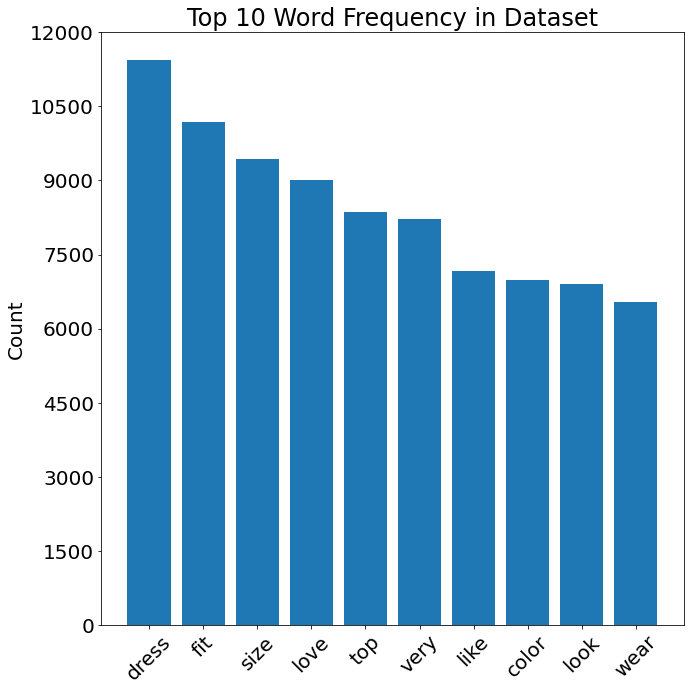

In [88]:
# Ten Most common words in the full dataset
sample_freq_dist = FreqDist(df.Clean.explode())
visualize_top_10(sample_freq_dist, "Top 10 Word Frequency in Dataset")
plt.savefig('./images/top_10_word_frequency', facecolor='white', dpi=500)

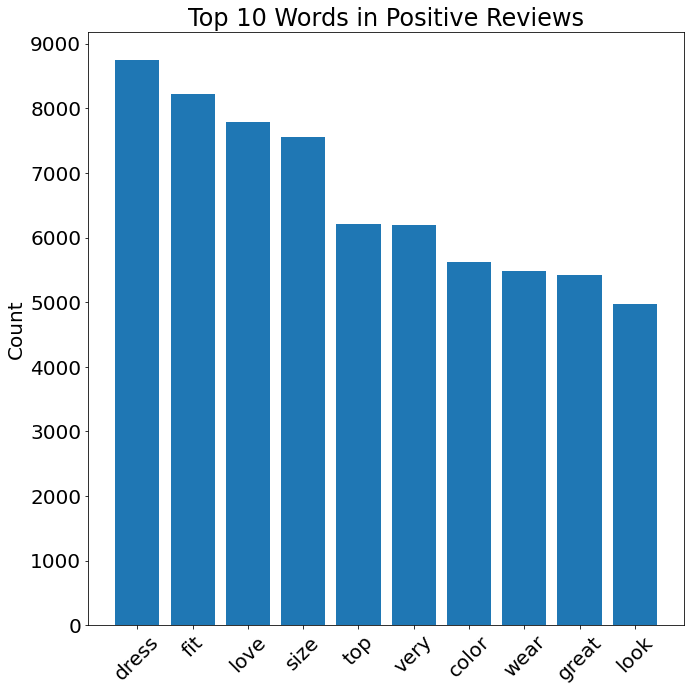

In [89]:
# Ten most common words appearing in positive reviews
pos_freq_dist = FreqDist(df['Clean'].loc[df['Positive_Rating'] == 1].explode())
visualize_top_10(pos_freq_dist, 'Top 10 Words in Positive Reviews')
plt.savefig('./images/top_10_positive_word_frequency', facecolor='white', dpi=500)

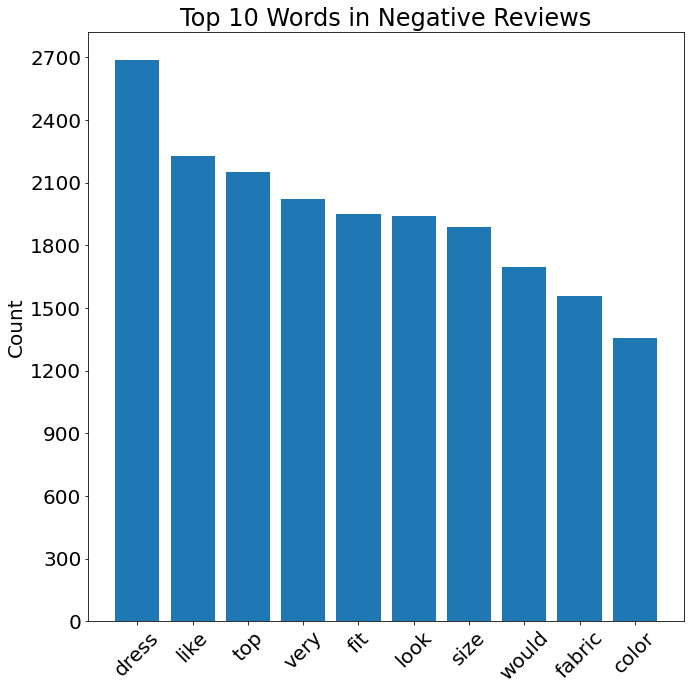

In [90]:
# Ten most common words appearing in negative reviews
neg_freq_dist = FreqDist(df['Clean'].loc[df['Positive_Rating'] == 0].explode())
visualize_top_10(neg_freq_dist, 'Top 10 Words in Negative Reviews')
plt.savefig('./images/top_10_negative_word_frequency', facecolor='white', dpi=500)

We see a lot of overlap in top words in positive reviews and top words in negative reviews. I initially created two datasets, once which removed additional words that were seen frequently in both positive and negative reviews and one that did not remove any additional stop words. The data set that did not remove any additional stop words performed better across models, so for my final dataset I will not be removing any additional words based on overlap.

The following is the final list of words that were removed in addition to standard stop words in my other dataset:
    ['dress', 'fit', 'top', 'size', 'very', 'look', 'like', 'color', 'love', 'small']   

In [91]:
#testing creating a WordCloud for first review

In [92]:
text = df['String'][0]

In [93]:
wc = WordCloud(background_color="white", max_words=2000,
              contour_width=3).generate(text)

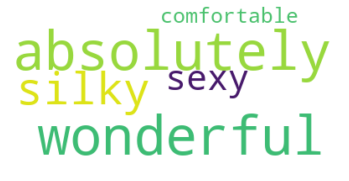

In [94]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Below is a WordCloud of the top words overall for presentation purposes.

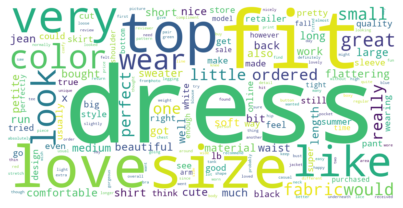

In [95]:
all_words = df['String']
text=" ".join(row for row in all_words)
word_freq = {}
for i in text.split():
    if i in word_freq:
        word_freq[i] += 1
    else:
        word_freq[i] = 1
all_wc = WordCloud(background_color="white", scale=3).generate_from_frequencies(word_freq) 
plt.imshow(all_wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

all_wc.to_file("./images/wordcloud.png");


# Exploring Ngrams

## Bigrams using CountVectorizer

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(ngram_range=(2,2), max_features=2000)
# matrix of ngrams
ngrams = c_vec.fit_transform(df['String'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})


In [97]:
df_ngram

,frequency,bigram
0,1348,true size
1,1090,fit perfectly
2,902,look great
3,883,very flattering
4,806,look like
...,...,...
1995,29,bit see
1996,29,bit low
1997,29,beautiful look
1998,29,arm fit


In [98]:
df_ngram['polarity'] = df_ngram['bigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram'].apply(lambda x: TextBlob(x).subjectivity)

In [99]:
df_ngram

,frequency,bigram,polarity,subjective
0,1348,true size,0.35,0.65
1,1090,fit perfectly,0.70,0.70
2,902,look great,0.80,0.75
3,883,very flattering,0.20,0.30
4,806,look like,0.00,0.00
...,...,...,...,...
1995,29,bit see,0.00,0.00
1996,29,bit low,0.00,0.30
1997,29,beautiful look,0.85,1.00
1998,29,arm fit,0.40,0.40


## Bigrams using TfdifVectorizer


Below I am doing some more data exploration to see which ngrams are appearing most frequently and if they are being categorized as polar/subjective. This is for my own data understanding.

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
t_vec = TfidfVectorizer(ngram_range=(2,2), max_features=2000)
# matrix of ngrams
ngrams = t_vec.fit_transform(df['String'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = t_vec.vocabulary_
df_ngram_tvec = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})


In [101]:
df_ngram_tvec

,frequency,bigram
0,319.881671,true size
1,266.091141,fit perfectly
2,240.854591,look great
3,240.509140,very flattering
4,216.166458,look like
...,...,...
1995,10.900752,neckline very
1996,10.837878,medium usually
1997,10.806020,lb dress
1998,10.553096,large retailer


In [102]:
df_ngram_tvec['polarity'] = df_ngram_tvec['bigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram_tvec['subjective'] = df_ngram_tvec['bigram'].apply(lambda x: TextBlob(x).subjectivity)

In [103]:
df_ngram_tvec

,frequency,bigram,polarity,subjective
0,319.881671,true size,0.350000,0.650000
1,266.091141,fit perfectly,0.700000,0.700000
2,240.854591,look great,0.800000,0.750000
3,240.509140,very flattering,0.200000,0.300000
4,216.166458,look like,0.000000,0.000000
...,...,...,...,...
1995,10.900752,neckline very,0.200000,0.300000
1996,10.837878,medium usually,-0.250000,0.250000
1997,10.806020,lb dress,0.000000,0.000000
1998,10.553096,large retailer,0.214286,0.428571


## Ngram Range of (1,2)

In [104]:
t_vec = TfidfVectorizer(ngram_range=(1,2), max_features=2000)
# matrix of ngrams
ngrams = t_vec.fit_transform(df['String'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = t_vec.vocabulary_
df_ngram_tvec = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'ngram'})

In [105]:
df_ngram_tvec[:50]

,frequency,ngram
0,981.611324,dress
1,791.249983,love
2,782.305179,fit
3,757.220717,top
4,756.846741,size
5,720.665864,very
6,638.077301,great
7,631.799511,color
8,621.405796,look
9,620.591384,like


In [106]:
df_ngram_tvec['polarity'] = df_ngram_tvec['ngram'].apply(lambda x: TextBlob(x).polarity)
df_ngram_tvec['subjective'] = df_ngram_tvec['ngram'].apply(lambda x: TextBlob(x).subjectivity)

In [107]:
df_ngram_tvec.sort_values('polarity')[:25]

,frequency,ngram,polarity,subjective
1153,22.997233,awful,-1.000,1.000000
1222,21.929510,terrible,-1.000,1.000000
952,28.070029,very disappointed,-0.975,0.975000
1196,22.250652,hate,-0.800,0.900000
236,106.202088,disappointed,-0.750,0.750000
350,73.938202,bad,-0.700,0.666667
525,49.171199,cold,-0.600,1.000000
1408,19.074688,disappointment,-0.600,0.400000
1075,24.689121,crazy,-0.600,0.900000
1898,14.565990,cold water,-0.600,1.000000


In [108]:
df_ngram_tvec.sort_values('polarity')[-25:]

,frequency,ngram,polarity,subjective
599,43.989208,dress beautiful,0.85,1.00
321,80.354237,beautifully,0.85,1.00
1061,25.108565,absolutely beautiful,0.85,1.00
1315,20.529575,beautiful fabric,0.85,1.00
533,48.308012,incredibly,0.90,0.90
1310,20.601530,very good,0.91,0.78
1142,23.247867,wonderfully,1.00,1.00
757,35.595317,excellent,1.00,1.00
279,93.166559,best,1.00,0.30
1159,22.801838,would perfect,1.00,1.00


## Saving Final Dataset

After final data cleaning and exploration, dataset is ready to be saved as final_data for model exporation.

In [109]:
df.to_csv('./data/final_data.csv', index=False)

# Limitations

Some limitations effecting my model include:
- Class Imbalance: almost 80% of the reviews were coded as "positive" based on a rating of 4 or 5
- User error when rating items: based on some of the reviews, it appears as though users may have mixed up the ratings and utilized 1 for positive reviews or 5 for negative reviews

# Next Steps

Given more time, I would expand this project by:
- Pulling in more data, specifically negative reviews or comments to help better train my model
- Create a dual classification system that first classifys comments as Spam or Not Spam, and then filters out Spam comments and classifies Not Spam as Positive or Negative
- Test my model with other platforms, such as Instagram comments
- Creating a "neutral" target for classification
- Create custom stopwords list, such as removing "not" from stopwords (may be helpful for my model when looking at bigrams)
- Upgrade and deploy an app for brands to utilize to perform Twitter API calls based on user inputted query terms and return a dataframe with one column of tweets and one column of classification

# Conclusion

In conclusion, using my generalizable model will allow women's fashion brand companies to feed comments from any web source to identify positively and negatively sentiment comments and respond appropriately. Utilizing the model will allow companies to save time and by flagging the comments for appropriate teams to respond to, such as Quality Assurance to respond to negative comments, or marketing to respond to and promote positive comments. Responding to these comments appropriately will improve products by identifying potential clothing quality issues if the same sentiment is being repeated, identify potential positive trends, boost visability by responding to comments, and improve brand loyalty by making customers feel heard.